In [38]:
# Stock Market Predicition

In [3]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import streamlit as st
import yfinance as yf

In [49]:
# Oracle_Stock = 'Oracle Dataset.csv'
# stock_data = pd.read_csv(Oracle_Stock)

# print(stock_data)

start = '2012-01-01'
end = '2022-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [50]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...
2022-12-23 00:00:00+00:00,89.589981,89.809998,90.099998,87.620003,87.620003,17815000
2022-12-27 00:00:00+00:00,87.714592,87.930000,89.500000,87.535004,89.309998,15470900


In [51]:
Moving_Avg_100days = data.Close.rolling(100).mean()

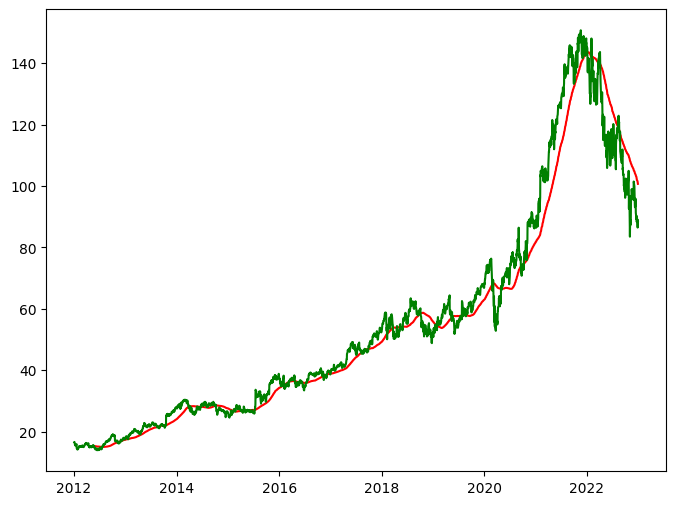

In [52]:
plt.figure(figsize=(8,6))
plt.plot(Moving_Avg_100days, 'r')
plt.plot(data.Close, 'g')
plt.show()

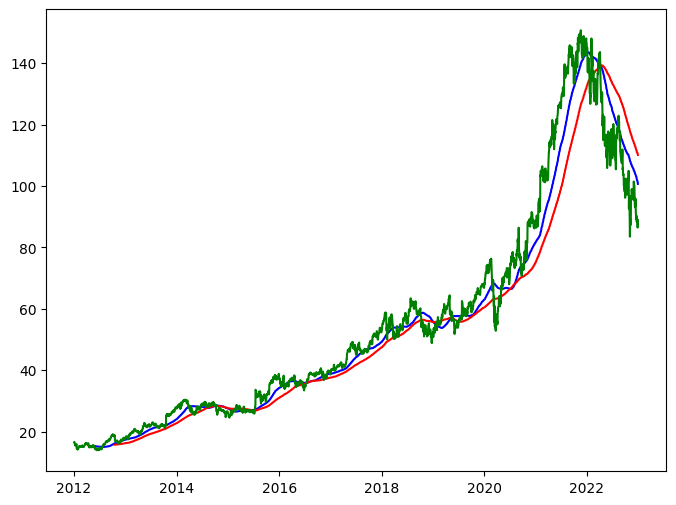

In [54]:
Moving_Avg_200days = data.Close.rolling(200).mean()

plt.figure(figsize=(8,6))
plt.plot(Moving_Avg_100days, 'b')
plt.plot(Moving_Avg_200days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [56]:
# if there are any null value, here we removed it
data.dropna(inplace=True)

In [60]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [61]:
data_train.shape[0]

2214

In [62]:
data_test.shape[0]

554

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [64]:
data_train_scaler = scaler.fit_transform(data_train)

In [65]:
# accurate to check 101th data by uploading 100 data set

x = []
y = []

for i in range(100, data_train_scaler.shape[0]):
    x.append(data_train_scaler[i-100:i])
    y.append(data_train_scaler[i,0])



In [67]:
x, y = np.array(x), np.array(y)

In [68]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [69]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))




C:\Users\shrih\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [71]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 33s 278ms/step - loss: 0.0587
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - loss: 0.0067
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - loss: 0.0076
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - loss: 0.0065
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - loss: 0.0055
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 285ms/step - loss: 0.0045
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - loss: 0.0051
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 264ms/step - loss: 0.0043
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - loss: 0.0042
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - loss: 0.0036
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 281ms/step - loss: 0.0035
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - loss: 0.0034
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 315ms/step - loss: 0.0036
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - loss: 0.0036
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 24s 

In [72]:
# model.summary()
pas_100days = data_train.tail(100)

In [73]:
data_test = pd.concat([pas_100days, data_test], ignore_index = True)

In [74]:
data_test_scale = scaler.fit_transform(data_test)

In [76]:
x = []
y =[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step


In [77]:
scale = 1/scaler.scale_

In [78]:
y_predict = y_predict * scale

In [79]:
y = y * scale

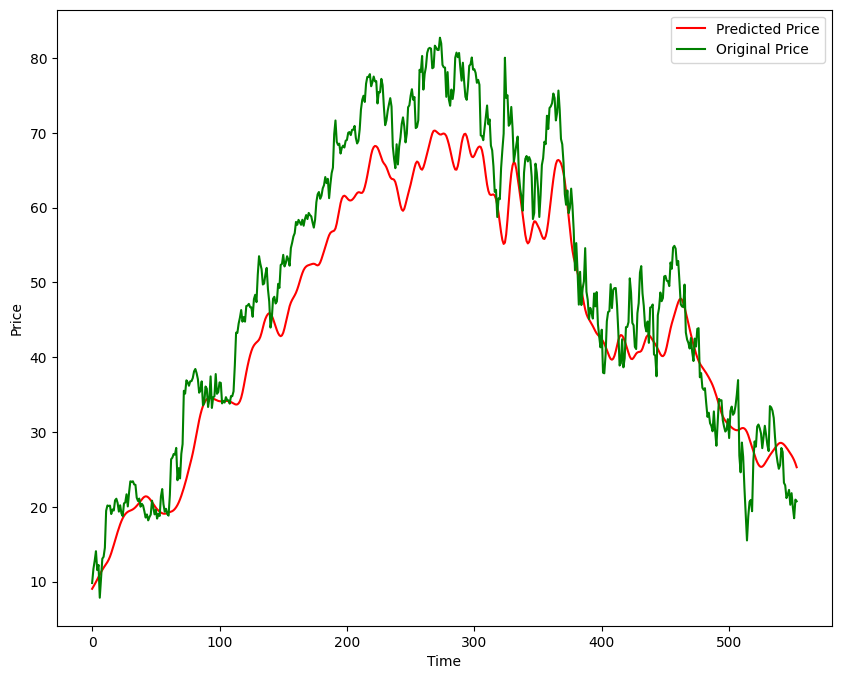

In [80]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [81]:
model.save('Stock Predictions Model.keras')